# Plotting the Energy Deposited in the Detector

The detector is an 8x8 grid of channels with channel 1 in the top left corner and channel 8 in the top right corner

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np, os, pandas as pd
from my_classes import *
%matplotlib widget

In [2]:
energy_dict = load_data_ohio()
x, y, z = create_3d_cords()

In [15]:
bar_energies = load_data_geant('/home/gmf/Projects/dosimeter/geant_data/extracted_data/bars/')
cube_energies = load_data_geant('/home/gmf/Projects/dosimeter/geant_data/extracted_data/cubes/')

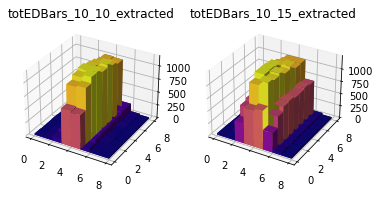

In [13]:
%matplotlib inline
cmap = cm.get_cmap('plasma')
data = bar_energies['totEDBars_10_15_extracted.txt']
norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart

fig = plt.figure()
ax = fig.add_subplot(122, projection='3d')
ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data)))
ax.set_title(f'totEDBars_10_15_extracted')
#fig.savefig('/home/gmf/Projects/dosimeter/supplimentary_material/10_15_bar_graph.png', dpi=200, facecolor='white')

data = bar_energies['totEDBars_10_10_extracted.txt']
norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart

ax = fig.add_subplot(121, projection='3d')
ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data)))
ax.set_title(f'totEDBars_10_10_extracted')
fig.savefig('/home/gmf/Projects/dosimeter/supplimentary_material/proof_of_geant_beam_width.png', facecolor='white')

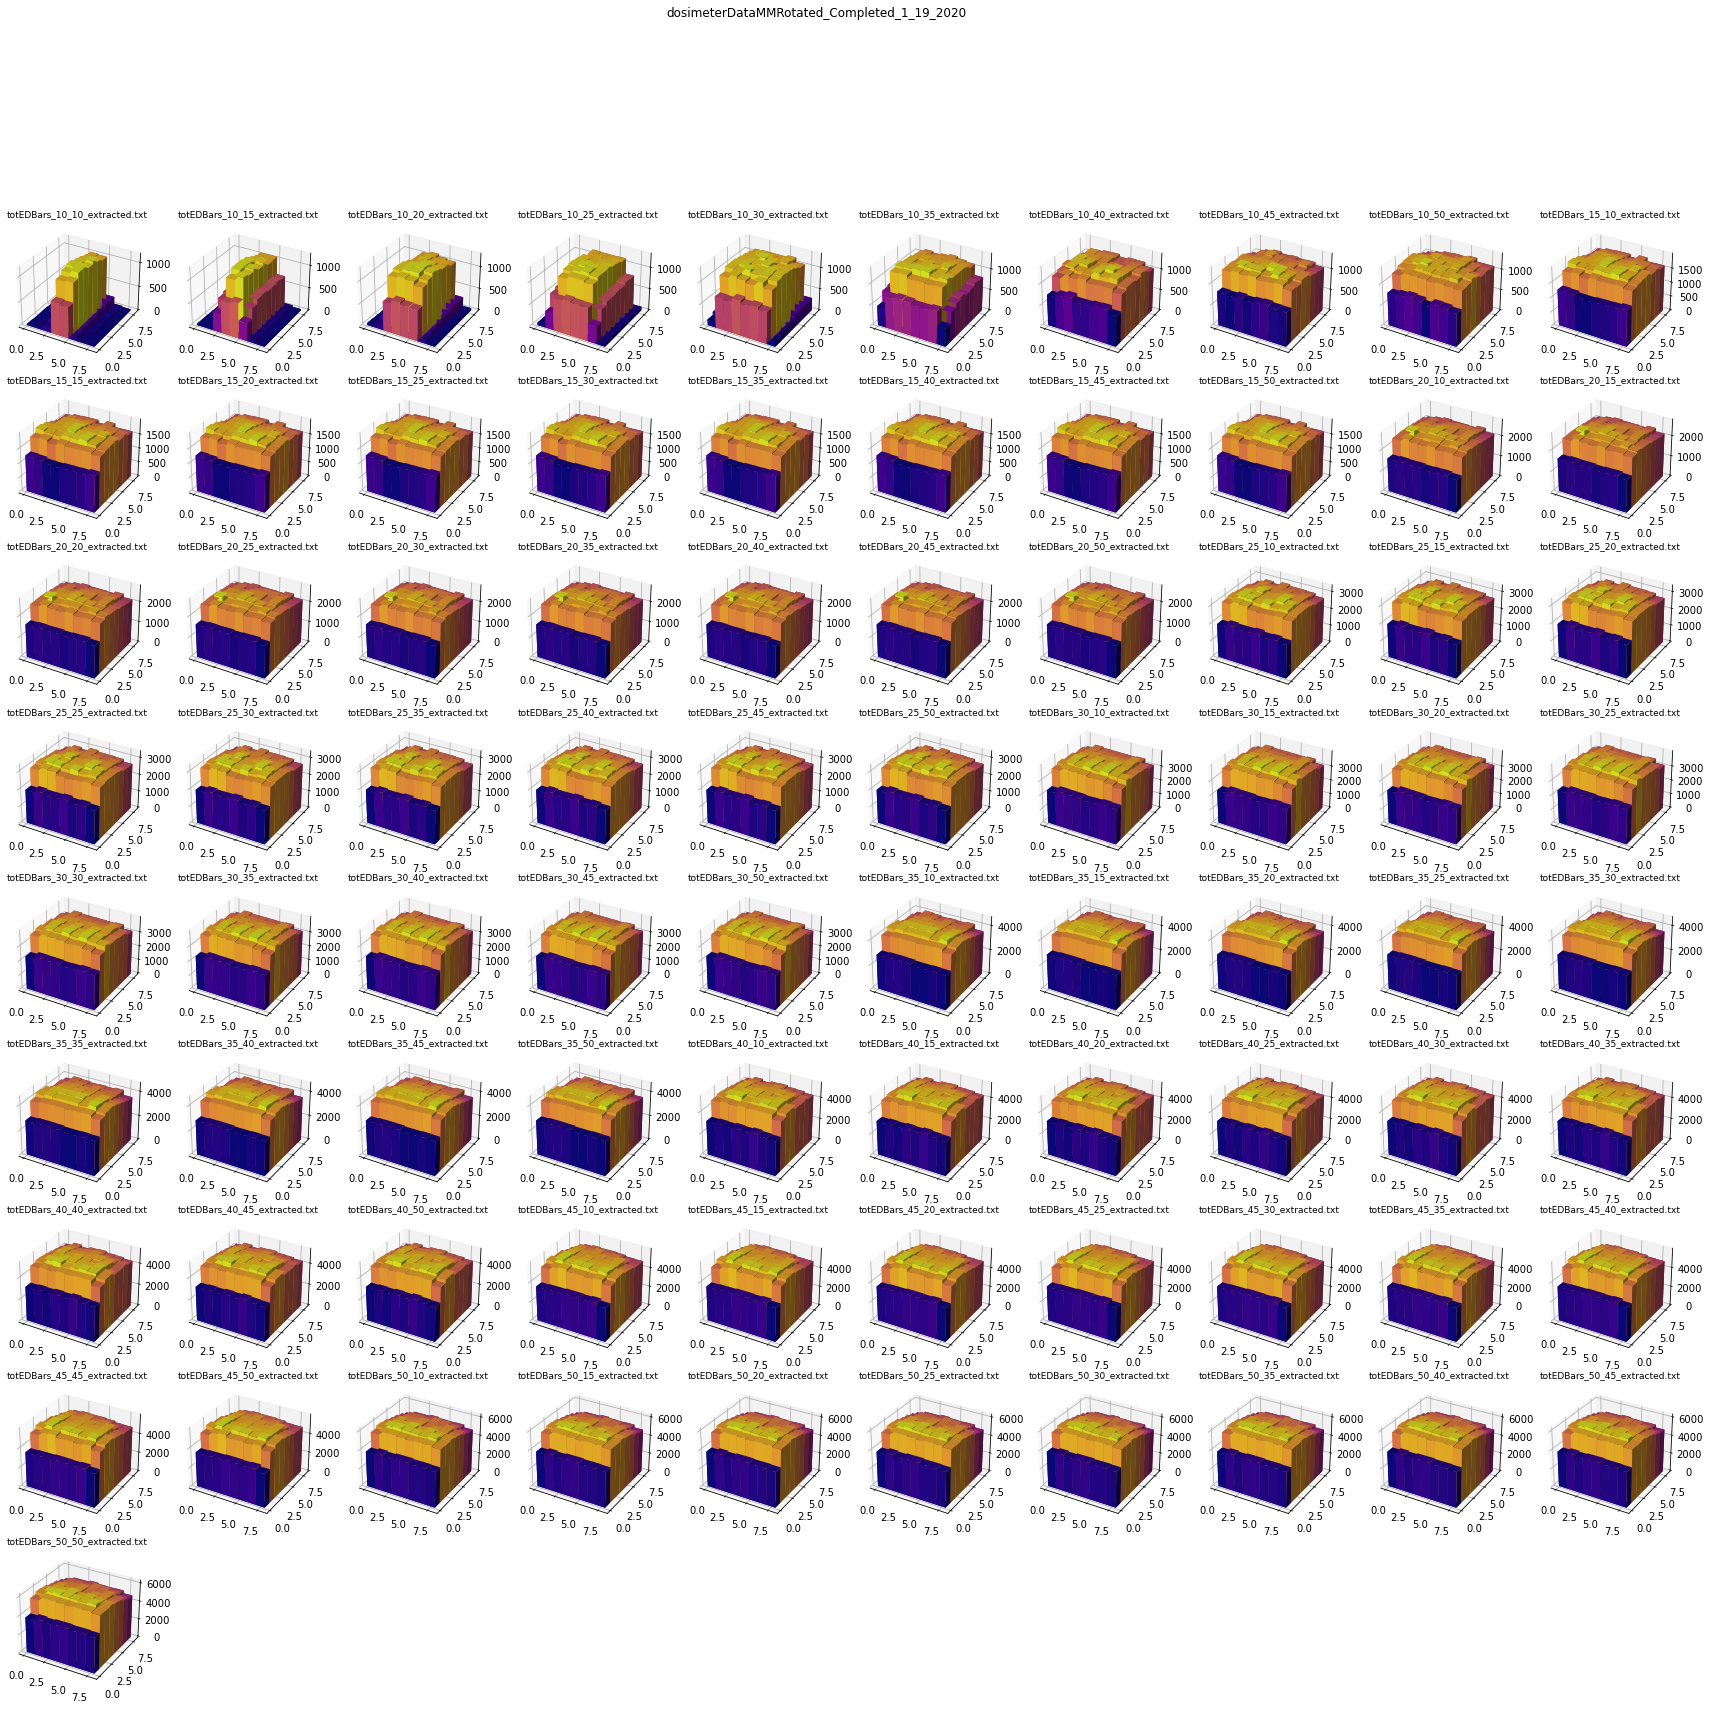

In [16]:
%matplotlib inline
cmap = cm.get_cmap('plasma')

fig = plt.figure(figsize=(30, 30))
fig.suptitle('dosimeterDataMMRotated_Completed_1_19_2020')
for index, (key, edep) in enumerate(bar_energies.items()):
    
    ax = fig.add_subplot(10, 10, 1+index, projection='3d')
    data = edep
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart
    ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data)))
    
    ax.set_title(key, fontdict=dict(fontsize=9))
    
#fig.savefig('/home/gmf/Projects/dosimeter/figures/geant_data_figures/all_geant_bar_dosimeterDataMMRotated_Completed_1_19_2020.png', facecolor='white', dpi=500)

***

## Figure of All Ohio Runs

```python
%matplotlib inline

# Gets the colormap plasma
cmap = cm.get_cmap('plasma')

fig = plt.figure(figsize=(30, 30))
for key, index in zip(sorted(energy_dict, reverse=True), range(len(energy_dict))):
    data = energy_dict[key]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart
    ax = fig.add_subplot(7, 6, 1 + index, projection='3d')
    if 'r' in key:
        # Rotated
        ax.bar3d(*bar_chart_helper_rot(data), color=cmap(norm(data)))
        ax.set_title(key)
        ax.set_zlabel('Channel 8s')
        ax.set_ylabel('Channel 1s')
        ax.set_xticks([])
        ax.set_yticks(list(range(1, 9)))
        ax.set_zticks(list(range(1, 9)))
        ax.set_zticklabels(reversed(list(range(8, 65, 8))))
        ax.set_yticklabels(list(range(1, 9)))
        ax.tick_params(axis='both', which='major', labelsize=6)
    else:
        ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data))) # Plots the barchart with the colors of each bar defined from the normalization
        ax.set_title(key)
        ax.set_xlabel('Channel 8s')
        ax.set_ylabel('Channel 1s')
        ax.set_zticks([])
        ax.set_xticks(list(range(1, 9)))
        ax.set_xticklabels(list(range(1,64, 8)))
        ax.set_yticks(list(range(1, 9)))#, labels=list(range(8, 65, 8)))
        #ax.set_yticklabels(reversed(list(range(8, 65, 8))))
        ax.tick_params(axis='both', which='major', labelsize=6)


fig.savefig('figures/ohio_data_figures/figure_of_all_ohio_runs.png', dpi=500, facecolor='white')
```

***

# Generic 3D Bar Chart

```python
%matplotlib inline
cmap = cm.get_cmap('plasma')
data = bar_energies['totEDBars_10_15_extracted.txt']
norm = Normalize(vmin=min(data), vmax=max(data)) # Defines color range for the specific bar chart

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data)))
```

***

## Creating Side-by-side Figures

```python
%matplotlib inline

cmap = cm.get_cmap('plasma')

keys = list(energy_dict.keys())

for index, (normal, rotated) in enumerate(zip(keys[0::2], keys[1::2])): # I want pairs of dictionary keys so make side-by-side graphs
    fig = plt.figure()
    fig.suptitle(f'Side by side of run {index+1}')

    # Non-Rotated
    data = energy_dict[normal]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines the color map for the specific bar chart
    ax = fig.add_subplot(122, projection='3d')

    ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data))) # Plots the barchart with the colors of each bar defined from the normalization
    ax.set_title(normal)
    ax.set_xlabel('Channel 8s')
    ax.set_ylabel('Channel 1s')
    ax.set_zticks([])
    ax.set_xticks(list(range(1, 9)))
    ax.set_xticklabels(list(range(1,64, 8)))
    ax.set_yticks(list(range(1, 9)))#, labels=list(range(8, 65, 8)))
    ax.tick_params(axis='both', which='major', labelsize=6)


    # Rotated
    data = energy_dict[rotated]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines the color map for the specific bar chart
    ax = fig.add_subplot(121, projection='3d')

    ax.bar3d(*bar_chart_helper_rot(data), color=cmap(norm(data)))
    ax.set_title(rotated)
    ax.set_zlabel('Channel 8s')
    ax.set_ylabel('Channel 1s')
    ax.set_xticks([])
    ax.set_yticks(list(range(1, 9)))
    ax.set_zticks(list(range(1, 9)))
    ax.set_zticklabels(reversed(list(range(8, 65, 8))))
    ax.set_yticklabels(list(range(1, 9)))
    ax.tick_params(axis='both', which='major', labelsize=6)


    fig.savefig(f'figures/ohio_data_figures/run_{str(index+1).zfill(2)}_sidebyside.png', dpi=500, facecolor='white')
    plt.close(fig)
```

***

## Verification Code for the Ordering of the Channels

```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget

channels = np.ones(64)
channels[:5] = 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(*bar_chart_helper(channels), shade=True)
ax.set_xlabel('Channel 1s')
ax.set_ylabel('Channel 8s')
fig.show()
```

***

## General 3D Scatter Plot Code

- Note:
    - If the data being plotted is the rotated data the cube of data must also be rotated
    - Here is what I was using:    
    - ```python
    data = np.rot90(reshape_extend(energy_dict['R03_r.txt']), axes=(0, 2))```

```python
x, y, z = create_3d_cords()

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=reshape_extend(energy_dict['R03.txt']), s=calculate_sizes(reshape_extend(energy_dict['R03.txt'])))
ax.set_xlabel('x axis')
ax.set_ylabel('Beam Enters from this side')
ax.set_title('R03.txt')
#plt.close(fig)
```